In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display_functions import display
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

In [10]:
data_agg = pd.read_csv("Aggregation.txt", sep="\s", header=None, engine='python')
data_agg = data_agg.rename(columns={0:'feature1', 1:'feature2', 2:'cluster'})
display(data_agg)

,feature1,feature2,cluster
0,15.55,28.65,2
1,14.90,27.55,2
2,14.45,28.35,2
3,14.15,28.80,2
4,13.75,28.05,2
...,...,...,...
783,7.80,3.35,5
784,8.05,2.75,5
785,8.50,3.25,5
786,8.10,3.55,5


In [11]:
data_flm = pd.read_csv("flame.txt", sep="\s", header=None, engine='python')
data_flm = data_flm.rename(columns={0:'feature1', 1:'feature2', 2:'cluster'})
display(data_flm)

,feature1,feature2,cluster
0,1.85,27.80,1
1,1.35,26.65,1
2,1.40,23.25,2
3,0.85,23.05,2
4,0.50,22.35,2
...,...,...,...
235,7.50,26.20,1
236,7.50,25.65,1
237,7.05,25.85,1
238,6.90,27.15,1


In [12]:
data_jain = pd.read_csv("jain.txt", sep="\s", header=None, engine='python')
data_jain = data_jain.rename(columns={0:'feature1', 1:'feature2', 2:'cluster'})
display(data_jain)

,feature1,feature2,cluster
0,0.85,17.45,2
1,0.75,15.60,2
2,3.30,15.45,2
3,5.25,14.20,2
4,4.90,15.65,2
...,...,...,...
368,38.75,16.85,1
369,39.00,16.60,1
370,38.25,17.35,1
371,39.50,16.95,1


In [13]:
data_sprl = pd.read_csv("spiral.txt", sep="\s", header=None, engine='python')
data_sprl = data_sprl.rename(columns={0:'feature1', 1:'feature2', 2:'cluster'})
display(data_sprl)

,feature1,feature2,cluster
0,31.95,7.95,3
1,31.15,7.30,3
2,30.45,6.65,3
3,29.70,6.00,3
4,28.90,5.55,3
...,...,...,...
307,15.75,13.85,2
308,15.65,14.05,2
309,15.65,14.25,2
310,15.65,14.50,2


## Part1: Plot feature 1 and 2

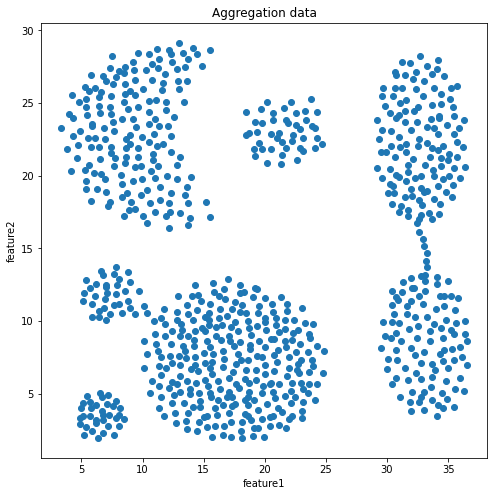

In [26]:
plt.figure(figsize=(8,8))
plt.title("Aggregation data")
plt.xlabel("feature1")
plt.ylabel("feature2")
plt.scatter(x = data_agg[['feature1']], y = data_agg[['feature2']])
plt.show()

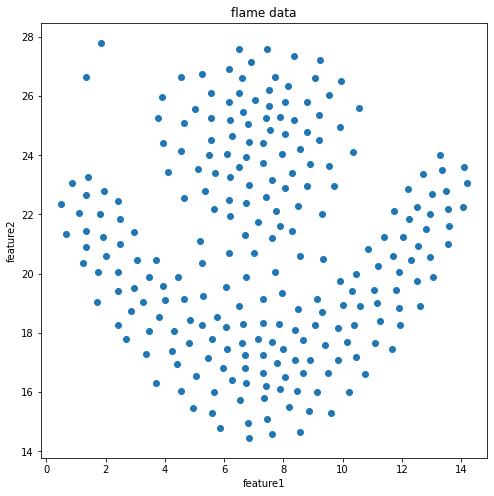

In [27]:
plt.figure(figsize=(8,8))
plt.title("flame data")
plt.xlabel("feature1")
plt.ylabel("feature2")
plt.scatter(x = data_flm[['feature1']], y = data_flm[['feature2']])
plt.show()

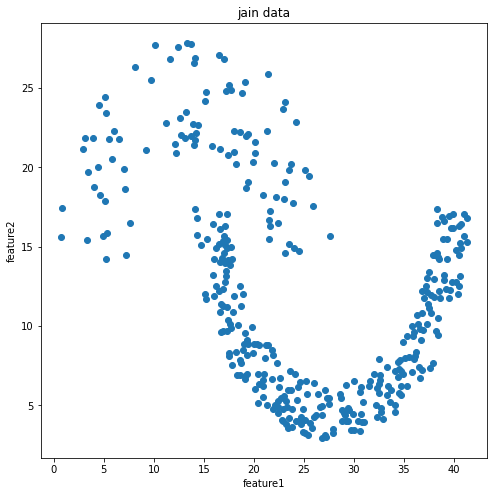

In [28]:
plt.figure(figsize=(8,8))
plt.title("jain data")
plt.xlabel("feature1")
plt.ylabel("feature2")
plt.scatter(x = data_jain[['feature1']], y = data_jain[['feature2']])
plt.show()

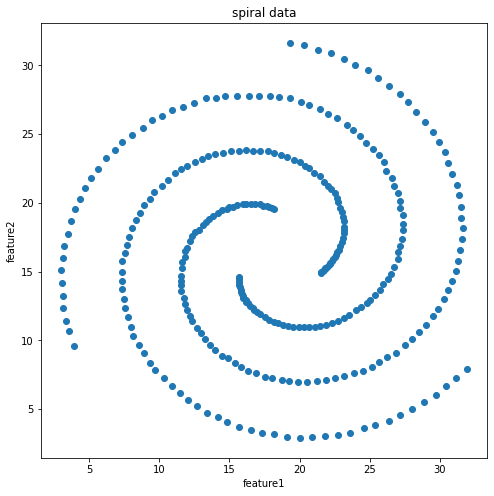

In [29]:
plt.figure(figsize=(8,8))
plt.title("spiral data")
plt.xlabel("feature1")
plt.ylabel("feature2")
plt.scatter(x = data_sprl[['feature1']], y = data_sprl[['feature2']])
plt.show()

## Part2: K-means

In [98]:
X_agg = data_agg[['feature1', 'feature2']].values

In [100]:
cluster_count = int(max(data_agg[['cluster']].values))
k_means = KMeans(n_clusters=cluster_count)
# arr = [X_agg[1:,1:]]
detected_cluster = k_means.fit_predict(X_agg)

In [103]:
data_agg['new_cluster'] = detected_cluster

In [104]:
display(data_agg)

,feature1,feature2,cluster,new_cluster
0,15.55,28.65,2,0
1,14.90,27.55,2,3
2,14.45,28.35,2,3
3,14.15,28.80,2,3
4,13.75,28.05,2,3
...,...,...,...,...
783,7.80,3.35,5,6
784,8.05,2.75,5,6
785,8.50,3.25,5,6
786,8.10,3.55,5,6


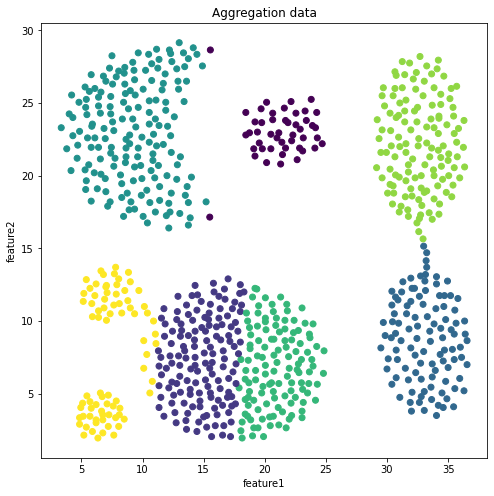

In [106]:
plt.figure(figsize=(8,8))
plt.title("Aggregation data")
plt.xlabel("feature1")
plt.ylabel("feature2")
plt.scatter(x = data_agg[['feature1']], y = data_agg[['feature2']], c=data_agg[['new_cluster']].values)
plt.show()

In [107]:
def do_the_work(data, title):
    X = data[['feature1', 'feature2']].values
    cluster_count = int(max(data[['cluster']].values))
    k_means = KMeans(n_clusters=cluster_count)
    # arr = [X_agg[1:,1:]]
    detected_cluster = k_means.fit_predict(X)
    data['new_cluster'] = detected_cluster
    display(data)
    plt.figure(figsize=(8, 8))
    plt.title("{} data".format(title))
    plt.xlabel("feature1")
    plt.ylabel("feature2")
    plt.scatter(x=data[['feature1']], y=data[['feature2']], c=data[['new_cluster']].values)
    plt.show()

,feature1,feature2,cluster,new_cluster
0,15.55,28.65,2,5
1,14.90,27.55,2,2
2,14.45,28.35,2,2
3,14.15,28.80,2,2
4,13.75,28.05,2,2
...,...,...,...,...
783,7.80,3.35,5,4
784,8.05,2.75,5,4
785,8.50,3.25,5,4
786,8.10,3.55,5,4


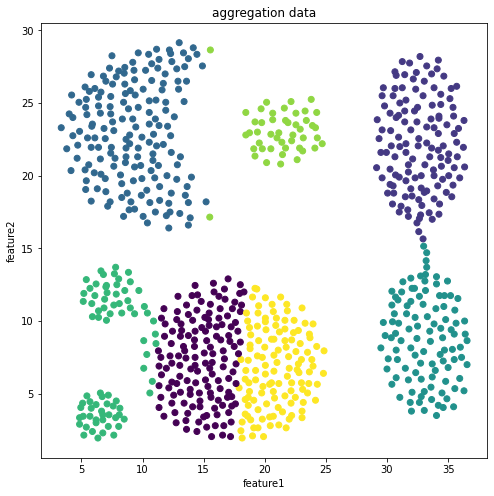

,feature1,feature2,cluster,new_cluster
0,1.85,27.80,1,1
1,1.35,26.65,1,1
2,1.40,23.25,2,1
3,0.85,23.05,2,1
4,0.50,22.35,2,1
...,...,...,...,...
235,7.50,26.20,1,1
236,7.50,25.65,1,1
237,7.05,25.85,1,1
238,6.90,27.15,1,1


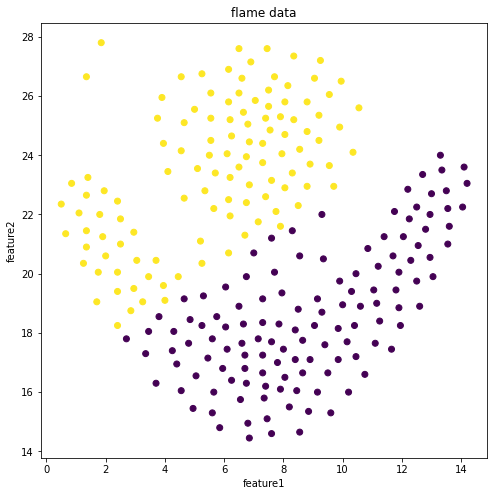

,feature1,feature2,cluster,new_cluster
0,0.85,17.45,2,0
1,0.75,15.60,2,0
2,3.30,15.45,2,0
3,5.25,14.20,2,0
4,4.90,15.65,2,0
...,...,...,...,...
368,38.75,16.85,1,1
369,39.00,16.60,1,1
370,38.25,17.35,1,1
371,39.50,16.95,1,1


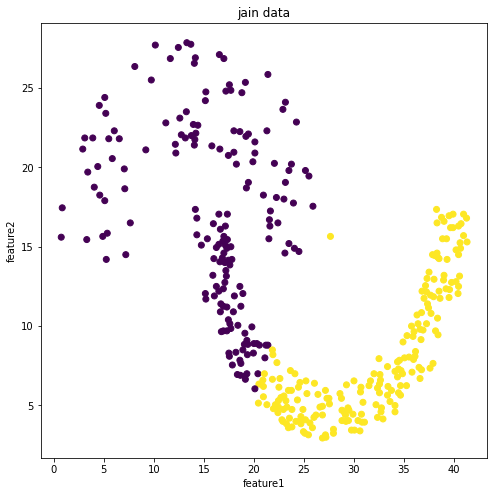

,feature1,feature2,cluster,new_cluster
0,31.95,7.95,3,0
1,31.15,7.30,3,0
2,30.45,6.65,3,0
3,29.70,6.00,3,0
4,28.90,5.55,3,0
...,...,...,...,...
307,15.75,13.85,2,0
308,15.65,14.05,2,2
309,15.65,14.25,2,2
310,15.65,14.50,2,2


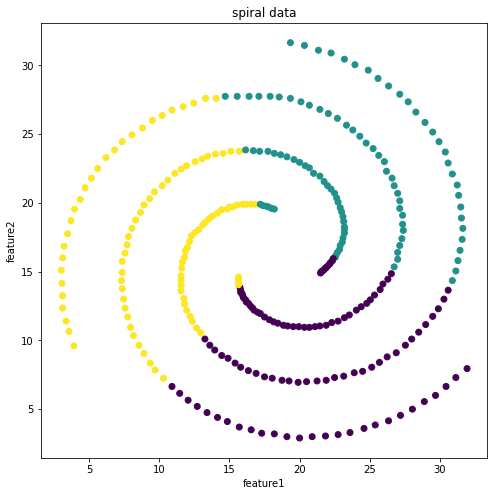

In [108]:
container = [(data_agg, "aggregation"), (data_flm, "flame"), (data_jain, 'jain'), (data_sprl, 'spiral')]
for data in container:
    do_the_work(data[0], data[1])

## Part3: AgglomerativeClustering

In [110]:
def do_the_work(data, title):
    X = data[['feature1', 'feature2']].values
    cluster_count = int(max(data[['cluster']].values))
    aglo = AgglomerativeClustering(n_clusters=cluster_count)
    # arr = [X_agg[1:,1:]]
    detected_cluster = aglo.fit_predict(X)
    data['new_cluster'] = detected_cluster
    display(data)
    plt.figure(figsize=(8, 8))
    plt.title("{} data".format(title))
    plt.xlabel("feature1")
    plt.ylabel("feature2")
    plt.scatter(x=data[['feature1']], y=data[['feature2']], c=data[['new_cluster']].values)
    plt.show()

,feature1,feature2,cluster,new_cluster
0,15.55,28.65,2,0
1,14.90,27.55,2,0
2,14.45,28.35,2,0
3,14.15,28.80,2,0
4,13.75,28.05,2,0
...,...,...,...,...
783,7.80,3.35,5,1
784,8.05,2.75,5,1
785,8.50,3.25,5,1
786,8.10,3.55,5,1


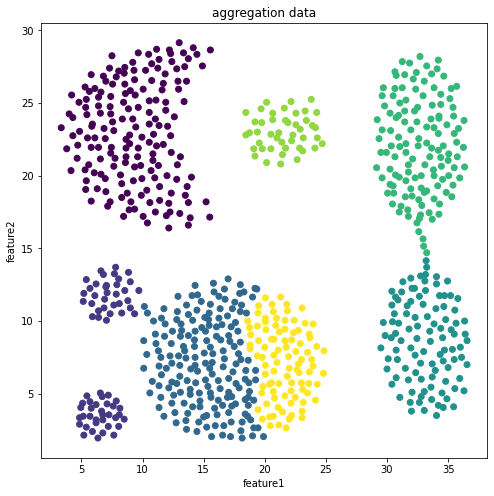

,feature1,feature2,cluster,new_cluster
0,1.85,27.80,1,0
1,1.35,26.65,1,0
2,1.40,23.25,2,1
3,0.85,23.05,2,1
4,0.50,22.35,2,1
...,...,...,...,...
235,7.50,26.20,1,0
236,7.50,25.65,1,0
237,7.05,25.85,1,0
238,6.90,27.15,1,0


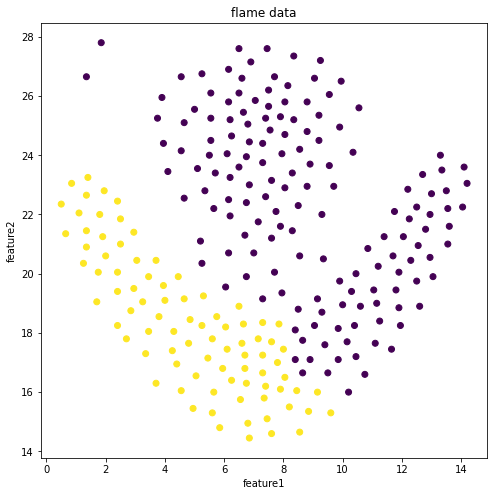

,feature1,feature2,cluster,new_cluster
0,0.85,17.45,2,1
1,0.75,15.60,2,1
2,3.30,15.45,2,1
3,5.25,14.20,2,1
4,4.90,15.65,2,1
...,...,...,...,...
368,38.75,16.85,1,0
369,39.00,16.60,1,0
370,38.25,17.35,1,0
371,39.50,16.95,1,0


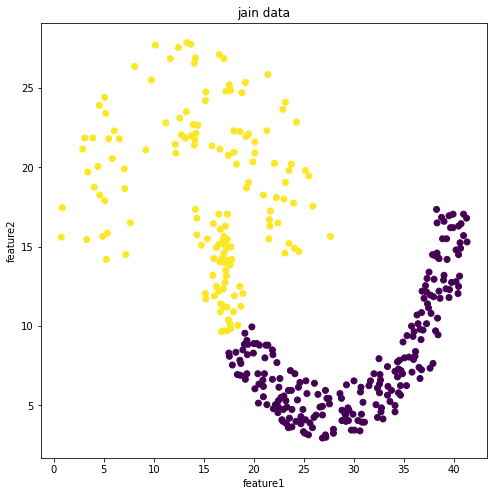

,feature1,feature2,cluster,new_cluster
0,31.95,7.95,3,2
1,31.15,7.30,3,2
2,30.45,6.65,3,2
3,29.70,6.00,3,2
4,28.90,5.55,3,2
...,...,...,...,...
307,15.75,13.85,2,1
308,15.65,14.05,2,1
309,15.65,14.25,2,1
310,15.65,14.50,2,1


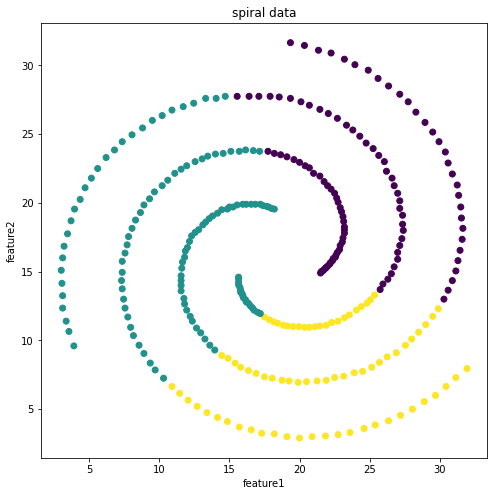

In [111]:
for data in container:
    do_the_work(data[0], data[1])

## Part4: DBSCAN

In [127]:
def do_the_work(data, title, epsilon, min_nighbor):
    X = data[['feature1', 'feature2']].values
    cluster_count = int(max(data[['cluster']].values))
    dbscan = DBSCAN(eps=epsilon, min_samples=min_nighbor)
    detected_cluster = dbscan.fit_predict(X)
    data['new_cluster'] = detected_cluster
    display(data)
    plt.figure(figsize=(8, 8))
    plt.title("{} data".format(title))
    plt.xlabel("feature1")
    plt.ylabel("feature2")
    plt.scatter(x=data[['feature1']], y=data[['feature2']], c=data[['new_cluster']].values, alpha=0.8)
    plt.show()

,feature1,feature2,cluster,new_cluster
0,15.55,28.65,2,0
1,14.90,27.55,2,0
2,14.45,28.35,2,0
3,14.15,28.80,2,0
4,13.75,28.05,2,0
...,...,...,...,...
783,7.80,3.35,5,6
784,8.05,2.75,5,6
785,8.50,3.25,5,6
786,8.10,3.55,5,6


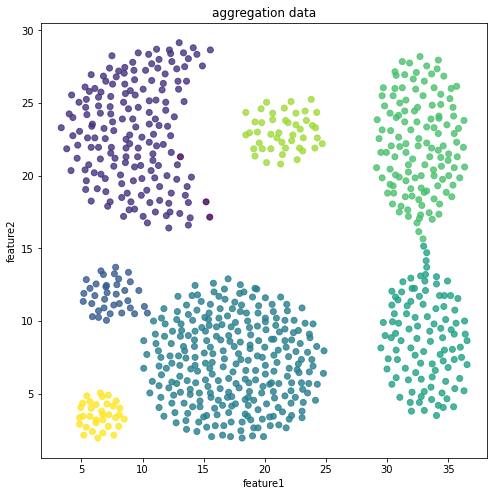

,feature1,feature2,cluster,new_cluster
0,1.85,27.80,1,-1
1,1.35,26.65,1,-1
2,1.40,23.25,2,0
3,0.85,23.05,2,0
4,0.50,22.35,2,0
...,...,...,...,...
235,7.50,26.20,1,1
236,7.50,25.65,1,1
237,7.05,25.85,1,1
238,6.90,27.15,1,1


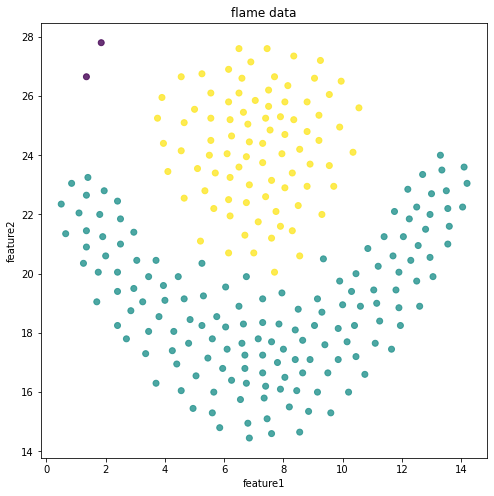

,feature1,feature2,cluster,new_cluster
0,0.85,17.45,2,-1
1,0.75,15.60,2,-1
2,3.30,15.45,2,-1
3,5.25,14.20,2,-1
4,4.90,15.65,2,-1
...,...,...,...,...
368,38.75,16.85,1,0
369,39.00,16.60,1,0
370,38.25,17.35,1,0
371,39.50,16.95,1,0


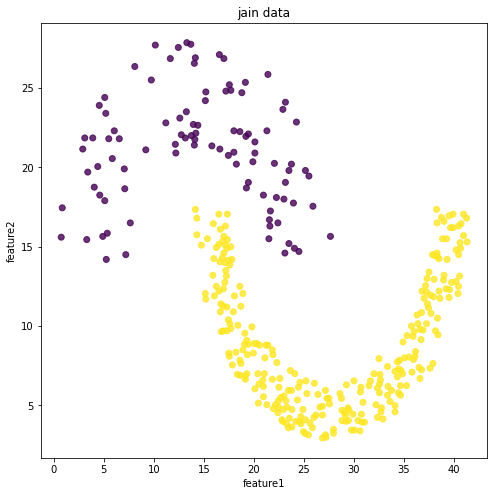

,feature1,feature2,cluster,new_cluster
0,31.95,7.95,3,0
1,31.15,7.30,3,0
2,30.45,6.65,3,0
3,29.70,6.00,3,0
4,28.90,5.55,3,0
...,...,...,...,...
307,15.75,13.85,2,2
308,15.65,14.05,2,2
309,15.65,14.25,2,2
310,15.65,14.50,2,2


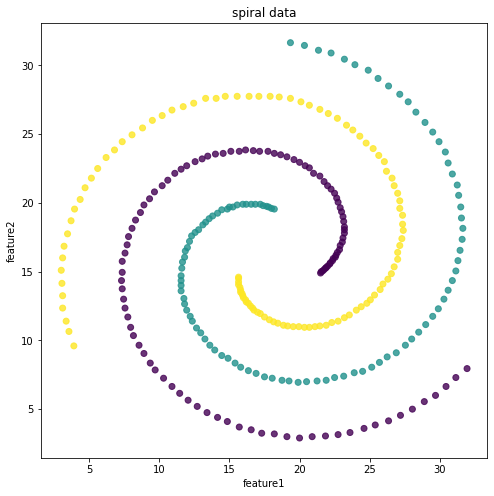

In [128]:
container = [
    (data_agg, "aggregation", 1.5, 8),
    (data_flm, "flame", 1.48, 12),
    (data_jain, 'jain', 2.5, 15),
    (data_sprl, 'spiral', 1.65, 3)
]
for data, title, epsi, sample in container:
    do_the_work(data, title, epsi, sample)